In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [2]:
!pip install --upgrade mplfinance
import mplfinance as mpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.4 MB/s eta 0:00:00


In [3]:
# Baixa dados históricos da ação da Apple (AAPL) do Yahoo Finance
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166649,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [4]:
dados.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
dados.columns = ['abertura', 'maximo', 'minimo', 'fechamento', 'fech_ajust', 'volume']
dados

,abertura,maximo,minimo,fechamento,fech_ajust,volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166649,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [6]:
dados = dados.rename_axis('data')
# sempre atribuir para modificar. dados recebe dados.rename
dados

,abertura,maximo,minimo,fechamento,fech_ajust,volume
data,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166649,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


#Gráficos

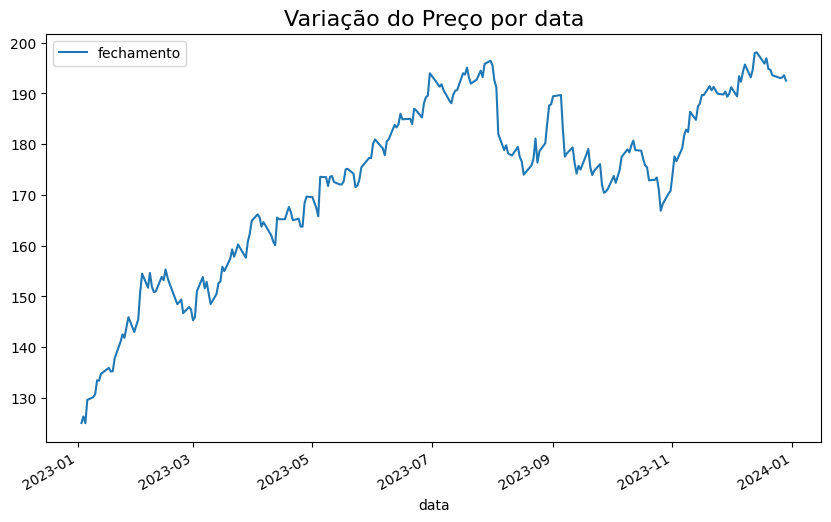

In [7]:
dados['fechamento'].plot(figsize=(10,6))
plt.title('Variação do Preço por data', fontsize=16)
plt.legend(['fechamento'])

In [8]:
# selecionando as 60 primeira linhas e copiar
df = dados.head(60).copy()
df

,abertura,maximo,minimo,fechamento,fech_ajust,volume
data,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166649,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.837662,63896200
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.578842,69458900
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.499374,71379600
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.840134,57809700


In [9]:
# convertendo o indice de uma coluna de data
df['data'] = df.index
# convertendo as data para o formato numerico de matplotlib
# isso é necessário para que o matplotlib possa plotar as datas corretamente no gráfico
df['data'] = df['data'].apply(mdates.date2num)
# apply função que recebe outra função
df

,abertura,maximo,minimo,fechamento,fech_ajust,volume,data
data,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500,19360.0
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600,19361.0
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166649,80962700,19362.0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700,19363.0
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800,19366.0
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.837662,63896200,19367.0
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.578842,69458900,19368.0
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.499374,71379600,19369.0
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.840134,57809700,19370.0


In [15]:
df.columns

Index(['abertura', 'maximo', 'minimo', 'fechamento', 'fech_ajust', 'volume',
       'data'],
      dtype='object')

In [19]:
import plotly.graph_objects as go

# Gráfico 1: Preço de Abertura, Máximo, Mínimo e Fechamento ao longo do Tempo
fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=df['data'], y=df['abertura'], mode='lines', fill='tozeroy', name='Abertura'))
fig1.add_trace(go.Scatter(x=df['data'], y=df['maximo'], mode='lines', fill='tonexty', name='Máximo'))
fig1.add_trace(go.Scatter(x=df['data'], y=df['minimo'], mode='lines', fill='tonexty', name='Mínimo'))
fig1.add_trace(go.Scatter(x=df['data'], y=df['fechamento'], mode='lines', fill='tonexty', name='Fechamento'))

fig1.update_layout(title='Preço de Abertura, Máximo, Mínimo e Fechamento ao longo do Tempo',
                   xaxis_title='Data',
                   yaxis_title='Preço')

# Gráfico 2: Volume de Negociação ao longo do Tempo
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=df['data'], y=df['volume'], mode='lines', fill='tozeroy', name='Volume'))

fig2.update_layout(title='Volume de Negociação ao longo do Tempo',
                   xaxis_title='Data',
                   yaxis_title='Volume')

# Gráfico 3: Preço de Fechamento Ajustado em relação ao Preço de Fechamento
fig3 = go.Figure()

dif_fech_fechajust = df['fechamento'] - df['fech_ajust']
fig3.add_trace(go.Scatter(x=df['data'], y=dif_fech_fechajust, mode='lines', fill='tozeroy', name='Diferença'))

fig3.update_layout(title='Preço de Fechamento Ajustado em relação ao Preço de Fechamento',
                   xaxis_title='Data',
                   yaxis_title='Diferença')

# Exibindo os gráficos
fig1.show()
fig2.show()
fig3.show()


In [26]:
# Definindo os dados para o gráfico de radar
categorias = ['Abertura', 'Máximo', 'Mínimo', 'Fechamento', 'Fechamento Ajustado', 'Volume']
valores = [dados['abertura'].mean(), dados['maximo'].mean(), dados['minimo'].mean(), dados['fechamento'].mean(), dados['fech_ajust'].mean(), dados['volume'].mean()]

# Criando o gráfico de radar
fig_radar = go.Figure(data=go.Scatterpolar(
      r=valores,
      theta=categorias,
      fill='toself'
))

# Atualizando o layout do gráfico
fig_radar.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, max(valores)],  # Defina o intervalo máximo de acordo com os dados
    )),
  showlegend=False
)

# Adicionando título ao gráfico
fig_radar.update_layout(title_text="Comparação das Colunas")

# Mostrando o gráfico
fig_radar.show()

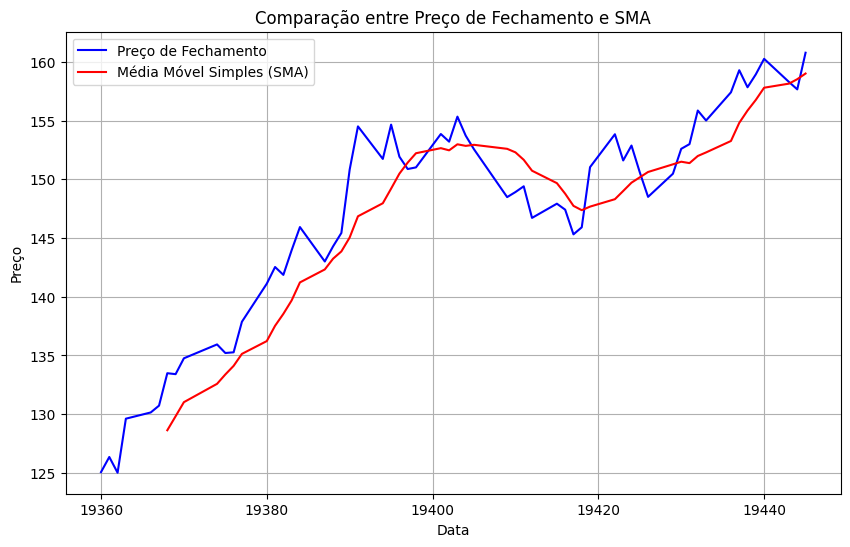

In [31]:
import matplotlib.pyplot as plt

# Calculando a Média Móvel Simples (SMA)
df['SMA'] = df['fechamento'].rolling(window=7).mean()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['data'], df['fechamento'], label='Preço de Fechamento', color='blue')
plt.plot(df['data'], df['SMA'], label='Média Móvel Simples (SMA)', color='red')
plt.title('Comparação entre Preço de Fechamento e SMA')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

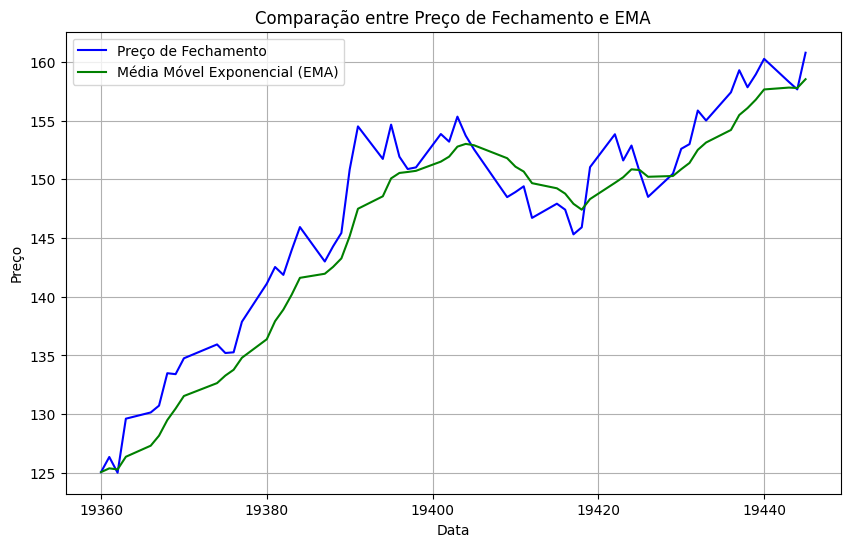

In [32]:
# Calculando a Média Móvel Exponencial (EMA)
df['EMA'] = df['fechamento'].ewm(span=7, adjust=False).mean()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['data'], df['fechamento'], label='Preço de Fechamento', color='blue')
plt.plot(df['data'], df['EMA'], label='Média Móvel Exponencial (EMA)', color='green')
plt.title('Comparação entre Preço de Fechamento e EMA')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()


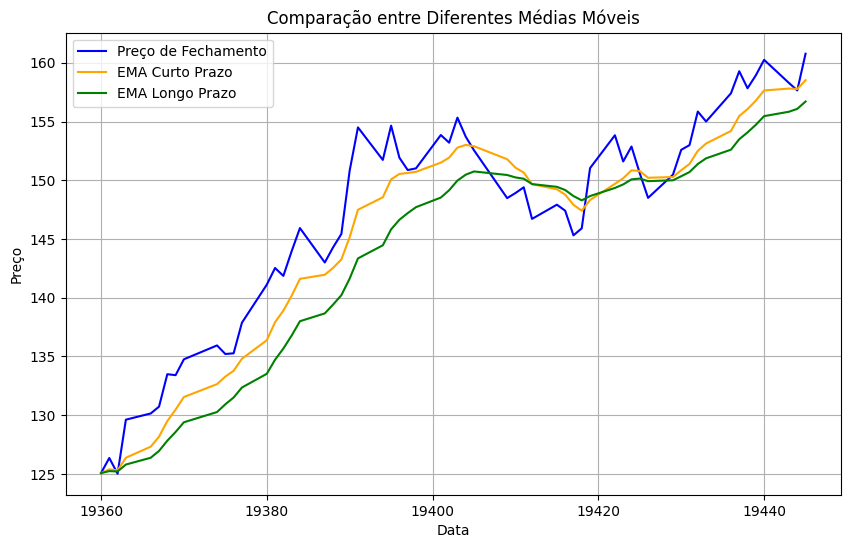

In [34]:
# Calculando diferentes médias móveis
df['EMA_curto'] = df['fechamento'].ewm(span=7, adjust=False).mean()
df['EMA_longo'] = df['fechamento'].ewm(span=14, adjust=False).mean()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['data'], df['fechamento'], label='Preço de Fechamento', color='blue')
plt.plot(df['data'], df['EMA_curto'], label='EMA Curto Prazo', color='orange')
plt.plot(df['data'], df['EMA_longo'], label='EMA Longo Prazo', color='green')
plt.title('Comparação entre Diferentes Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()
